<a href="https://colab.research.google.com/github/5hweta28/Network-traffic-classifier-using-C-RNN-/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Network traffic classifier with convolutional and recurrent neural networks for Internet of Things**

Plotting of
1. Frequency Distribution of Protocol Type
2. Top 15 Most frequent service
3. Frequeny Distribution of Flag

<ipython-input-1-d23ebc1230b2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top_15_services.index, rotation=45, ha='right')  # Rotate the x-axis labels for better readability


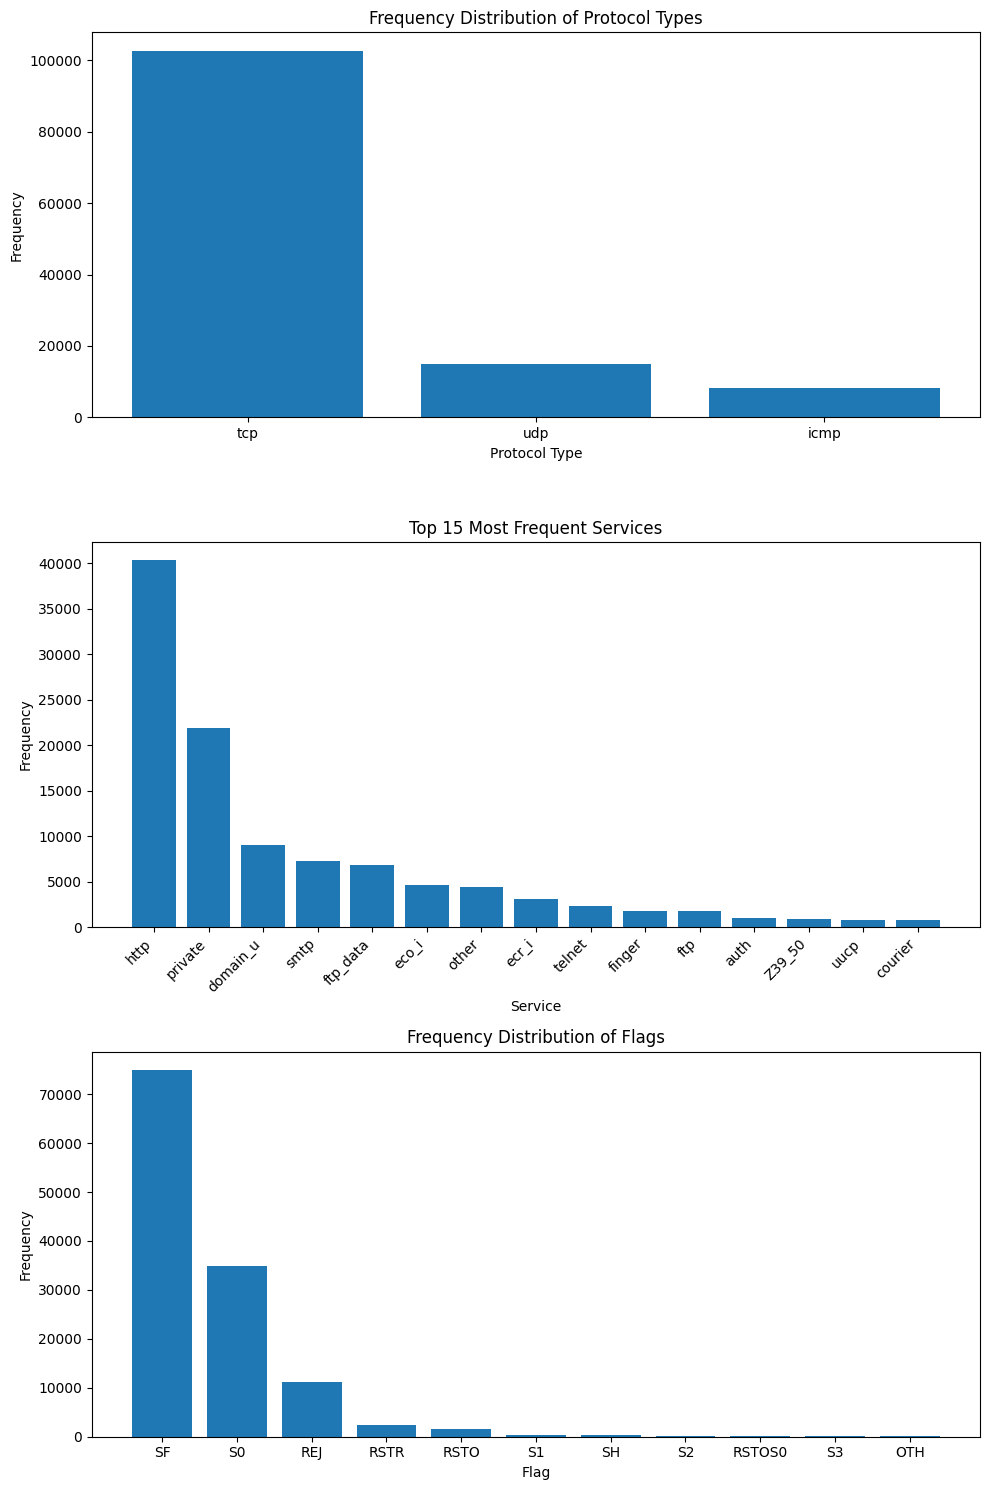

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV file
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_data.csv')

# Get the frequency distribution of 'protocol_type', 'service', and 'flag' attributes
protocol_type_counts = train_data['protocol_type'].value_counts()
service_counts = train_data['service'].value_counts()
flag_counts = train_data['flag'].value_counts()

# Create subplots for each attribute
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the frequency distribution of 'protocol_type'
axs[0].bar(protocol_type_counts.index, protocol_type_counts.values)
axs[0].set_xlabel('Protocol Type')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Frequency Distribution of Protocol Types')

# Get the top 15 most frequent services
top_15_services = service_counts.nlargest(15)

# Plot the frequency distribution of 'service'
axs[1].bar(top_15_services.index, top_15_services.values)
axs[1].set_xlabel('Service')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Top 15 Most Frequent Services')
axs[1].set_xticklabels(top_15_services.index, rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Plot the frequency distribution of 'flag'
axs[2].bar(flag_counts.index, flag_counts.values)
axs[2].set_xlabel('Flag')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Frequency Distribution of Flags')

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()

**Imapact of Network Architecture**

CNN Model
Epoch 1/10
1969/1969 [==============================] - 50s 24ms/step - loss: 4665.8042 - accuracy: 0.8809
Epoch 2/10
1969/1969 [==============================] - 42s 21ms/step - loss: 4676.8594 - accuracy: 0.8963
Epoch 3/10
1969/1969 [==============================] - 43s 22ms/step - loss: 5772.2632 - accuracy: 0.9085
Epoch 4/10
1969/1969 [==============================] - 42s 21ms/step - loss: 7214.9888 - accuracy: 0.9182
Epoch 5/10
1969/1969 [==============================] - 42s 21ms/step - loss: 8202.1260 - accuracy: 0.9179
Epoch 6/10
1969/1969 [==============================] - 40s 21ms/step - loss: 12072.3320 - accuracy: 0.9258
Epoch 7/10
1969/1969 [==============================] - 41s 21ms/step - loss: 18204.2695 - accuracy: 0.9256
Epoch 8/10
1969/1969 [==============================] - 41s 21ms/step - loss: 17742.0801 - accuracy: 0.9285
Epoch 9/10
1969/1969 [==============================] - 41s 21ms/step - loss: 20786.9043 - accuracy: 0.9257
Epoch 10/10
1969/1969 [

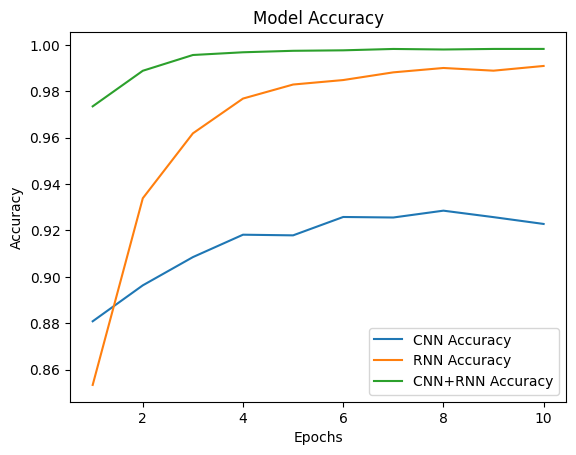

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

# Load the data from CSV files
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_data.csv')

# Define the label_mapping dictionary
label_mapping = {
    'normal': 0,
    'neptune': 1,
    'warezclient': 2,
    'ipsweep': 3,
    'portsweep': 4,
    'teardrop': 5,
    'nmap': 6,
    'satan': 7,
    'smurf': 8,
    'pod': 9,
    'back': 10,
    'guess_passwd': 11,
    'ftp_write': 12,
    'multihop': 13,
    'rootkit': 14,
    'buffer_overflow': 15,
    'imap': 16,
    'warezmaster': 17,
    'phf': 18,
    'land': 19,
    'loadmodule': 20,
    'spy': 21,
    'perl': 22
}

# Preprocess the training and test data
def preprocess_data(data, label_mapping=None):
    label_encoder = None
    if label_mapping is None:
        # If label_mapping is not provided, use the LabelEncoder
        label_encoder = LabelEncoder()
        data['class'] = label_encoder.fit_transform(data['class'])
    else:
        # Use the label_mapping to map class names to numerical labels
        data['class'] = data['class'].map(label_mapping)

    return data, label_encoder

# One-hot encode the categorical variables
train_data = pd.get_dummies(train_data, columns=['protocol_type', 'service', 'flag'])
test_data = pd.get_dummies(test_data, columns=['protocol_type', 'service', 'flag'])

# Preprocess the training and test data
train_data, label_encoder = preprocess_data(train_data, label_mapping=label_mapping)
test_data, _ = preprocess_data(test_data, label_mapping=label_mapping)

# Map test data labels to the same set of labels as training data
test_data['class'] = test_data['class'].map(label_mapping)

# Remove rows with missing labels from the test data
test_data = test_data.dropna(subset=['class'])

# Split the data into features (X) and labels (y)
X_train = train_data.drop('class', axis=1).values
y_train = train_data['class'].values
X_test = test_data.drop('class', axis=1).values
y_test = test_data['class'].values

# Ensure all columns are of numeric data type
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=len(label_mapping))
y_test = to_categorical(y_test, num_classes=len(label_mapping))

# Reshape the input data for CNN and RNN models (1D data)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Updated CNN model for 1D input data
def cnn_model_1d():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=4, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=3, strides=1, padding='same'))
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(len(label_mapping), activation='softmax'))

    return model

# Create the CNN model for 1D input data
cnn_model_1d = cnn_model_1d()
cnn_model_1d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# RNN model
def rnn_model():
    model = Sequential()
    model.add(LSTM(100, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Flatten())
    model.add(Dense(len(label_mapping), activation='softmax'))
    return model

rnn_model = rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.layers import TimeDistributed

def cnn_rnn_model():
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(32, return_sequences=True))  # Set return_sequences=True to get a 3D output
    model.add(TimeDistributed(Dense(64, activation='relu')))  # Apply Dense layer to every time step
    model.add(Flatten())  # Flatten the output before the final Dense layer
    model.add(Dense(len(label_mapping), activation='softmax'))  # Output layer with len(label_mapping) classes
    return model

# Create the CNN+RNN model
cnn_rnn_model = cnn_rnn_model()

# Compile the model with the learning rate and run_eagerly=True
cnn_rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Train the models and store the training history for accuracy
print("CNN Model")
cnn_history = cnn_model_1d.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
print("RNN Model")
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
print("CNN+RNN Model")
cnn_rnn_history = cnn_rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Extract the accuracy from the training history
cnn_accuracy = cnn_history.history['accuracy']
rnn_accuracy = rnn_history.history['accuracy']
cnn_rnn_accuracy = cnn_rnn_history.history['accuracy']

# Create the plot
epochs = range(1, 11)
plt.plot(epochs, cnn_accuracy, label='CNN Accuracy')
plt.plot(epochs, rnn_accuracy, label='RNN Accuracy')
plt.plot(epochs, cnn_rnn_accuracy, label='CNN+RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


**Impact of Feature set** (given code is only for rnn-cnn model did same for cnn and rnn model by changing the architecture)

788/788 [==============================] - 4s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


788/788 [==============================] - 6s 6ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


788/788 [==============================] - 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (Set 1): 0.5556261162929153
Precision (Set 1): 0.45417067325865546
Recall (Set 1): 0.5556261162929153
F1-score (Set 1): 0.4696678845232897
Accuracy (Set 2): 0.6404445326453662
Precision (Set 2): 0.5763954259086012
Recall (Set 2): 0.6404445326453662
F1-score (Set 2): 0.5918528540773192
Accuracy (Set 3): 0.5538797380432625
Precision (Set 3): 0.47379671984719623
Recall (Set 3): 0.5538797380432625
F1-score (Set 3): 0.45093417286486764


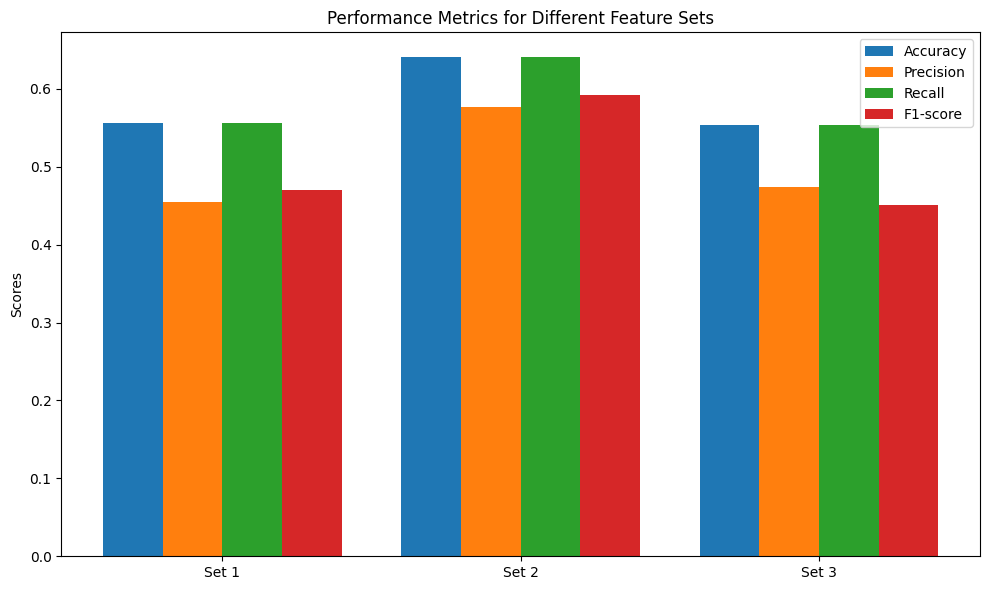

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, TimeDistributed, Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (assuming the dataset is named "data")
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_data.csv")

# Extract common features
common_features = data[["duration", "src_bytes", "dst_bytes"]]

# Prepare labels (assuming the target label column is the last one)
y = data.iloc[:, -1]
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_encoded = to_categorical(y.map(label_mapping))

# Define function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = rnn_cnn_model(X_train.shape[1])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=0)

    # Evaluate the model on the test data
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')
    f1 = f1_score(np.argmax(y_test, axis=1), y_pred_labels, average='weighted')

    return accuracy, precision, recall, f1

# Define the RNN-CNN model
def rnn_cnn_model(num_features):
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_features, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(32, return_sequences=True))
    model.add(TimeDistributed(Dense(64, activation='relu')))
    model.add(Flatten())
    model.add(Dense(len(label_mapping), activation='softmax'))
    return model

# One-hot encode the categorical features separately
protocol_encoder = OneHotEncoder()
service_encoder = OneHotEncoder()
flag_encoder = OneHotEncoder()

X_protocol_encoded = protocol_encoder.fit_transform(data[["protocol_type"]])
X_service_encoded = service_encoder.fit_transform(data[["service"]])
X_flag_encoded = flag_encoder.fit_transform(data[["flag"]])

# Concatenate the numerical features with the encoded categorical features for each feature set
X_set1 = np.hstack([common_features.values, X_protocol_encoded.toarray()])
X_set2 = np.hstack([common_features.values, X_service_encoded.toarray()])
X_set3 = np.hstack([common_features.values, X_flag_encoded.toarray()])

# Convert DataFrames to numpy arrays
X_set1_arr = X_set1.reshape((X_set1.shape[0], X_set1.shape[1], 1))
X_set2_arr = X_set2.reshape((X_set2.shape[0], X_set2.shape[1], 1))
X_set3_arr = X_set3.reshape((X_set3.shape[0], X_set3.shape[1], 1))

# Split the data into training and testing sets
X_set1_train, X_set1_test, y_train, y_test = train_test_split(X_set1_arr, y_encoded, test_size=0.2, random_state=42)
X_set2_train, X_set2_test, _, _ = train_test_split(X_set2_arr, y_encoded, test_size=0.2, random_state=42)
X_set3_train, X_set3_test, _, _ = train_test_split(X_set3_arr, y_encoded, test_size=0.2, random_state=42)

# Train and evaluate the models for each feature set
accuracy_set1, precision_set1, recall_set1, f1_set1 = train_and_evaluate(X_set1_train, X_set1_test, y_train, y_test)
accuracy_set2, precision_set2, recall_set2, f1_set2 = train_and_evaluate(X_set2_train, X_set2_test, y_train, y_test)
accuracy_set3, precision_set3, recall_set3, f1_set3 = train_and_evaluate(X_set3_train, X_set3_test, y_train, y_test)

# Print the results
print("Accuracy (Set 1):", accuracy_set1)
print("Precision (Set 1):", precision_set1)
print("Recall (Set 1):", recall_set1)
print("F1-score (Set 1):", f1_set1)

print("Accuracy (Set 2):", accuracy_set2)
print("Precision (Set 2):", precision_set2)
print("Recall (Set 2):", recall_set2)
print("F1-score (Set 2):", f1_set2)

print("Accuracy (Set 3):", accuracy_set3)
print("Precision (Set 3):", precision_set3)
print("Recall (Set 3):", recall_set3)
print("F1-score (Set 3):", f1_set3)

# Plot the results
labels = ['Set 1', 'Set 2', 'Set 3']
accuracy_scores = [accuracy_set1, accuracy_set2, accuracy_set3]
precision_scores = [precision_set1, precision_set2, precision_set3]
recall_scores = [recall_set1, recall_set2, recall_set3]
f1_scores = [f1_set1, f1_set2, f1_set3]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5 * width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5 * width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5 * width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f1_scores, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Feature Sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
